# Timeseries model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import pylab
import scipy
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error

In [2]:
# importing the data
raw_csv_data = pd.read_excel("CallCenterData.xlsx", engine='openpyxl')

In [3]:
# check point of data
df_comp = raw_csv_data.copy()

In [4]:
df_comp.head()

,month,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
0,2010-01-31,631,8,6,2,19,1,4
1,2010-02-28,633,9,7,3,27,1,3
2,2010-03-31,766,4,4,2,24,1,1
3,2010-04-30,768,12,6,3,32,1,1
4,2010-05-31,1003,2,7,2,42,1,4


In [5]:
df_comp.describe()

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,9856.704545,2411.856061,514.204545,112.454545,651.681818,2.250000,2.537879
std,6221.071304,1714.759241,392.882978,69.680773,395.949633,1.867255,1.161766
min,631.000000,2.000000,4.000000,2.000000,19.000000,0.000000,1.000000
25%,3744.250000,608.750000,119.000000,39.750000,363.500000,1.000000,1.000000
50%,9651.500000,2613.500000,486.000000,130.500000,581.000000,2.000000,3.000000
75%,15590.750000,4000.500000,901.500000,171.250000,997.750000,3.000000,4.000000
max,23602.000000,5138.000000,1310.000000,229.000000,1535.000000,11.000000,4.000000


In [6]:
df_comp.isna().sum()

month            0
Healthcare       0
Telecom          0
Banking          0
Technology       0
Insurance        0
#ofphonelines    0
#noofchannels    0
dtype: int64

## Converting Date to numeric

In [7]:
df_comp["timestamp"] = df_comp["month"].apply(lambda x : x.timestamp())

## Setting date as Index

In [8]:
# taken as a date time field
df_comp.month.describe()

/tmp/ipykernel_107100/2379132581.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comp.month.describe()


count                     132
unique                    132
top       2017-11-30 00:00:00
freq                        1
first     2010-01-31 00:00:00
last      2020-12-31 00:00:00
Name: month, dtype: object

In [9]:
df_comp.set_index("month", inplace=True)

In [10]:
df_comp.head()

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels,timestamp
month,,,,,,,,
2010-01-31,631,8,6,2,19,1,4,1.264896e+09
2010-02-28,633,9,7,3,27,1,3,1.267315e+09
2010-03-31,766,4,4,2,24,1,1,1.269994e+09
2010-04-30,768,12,6,3,32,1,1,1.272586e+09
2010-05-31,1003,2,7,2,42,1,4,1.275264e+09


In [11]:
# seeting the frequency as monthly
df_comp.asfreq('M')

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels,timestamp
month,,,,,,,,
2010-01-31,631,8,6,2,19,1,4,1.264896e+09
2010-02-28,633,9,7,3,27,1,3,1.267315e+09
2010-03-31,766,4,4,2,24,1,1,1.269994e+09
2010-04-30,768,12,6,3,32,1,1,1.272586e+09
2010-05-31,1003,2,7,2,42,1,4,1.275264e+09
...,...,...,...,...,...,...,...,...
2020-08-31,20257,4486,1111,212,371,4,3,1.598832e+09
2020-09-30,19207,4474,1020,135,362,3,1,1.601424e+09
2020-10-31,23414,5138,1310,188,523,3,4,1.604102e+09


In [12]:
# seeting the frequency as monthly
df_comp = df_comp.asfreq('M')

In [13]:
# checking for the null values
df_comp.isna().sum()

Healthcare       0
Telecom          0
Banking          0
Technology       0
Insurance        0
#ofphonelines    0
#noofchannels    0
timestamp        0
dtype: int64

## Time Series Visualization

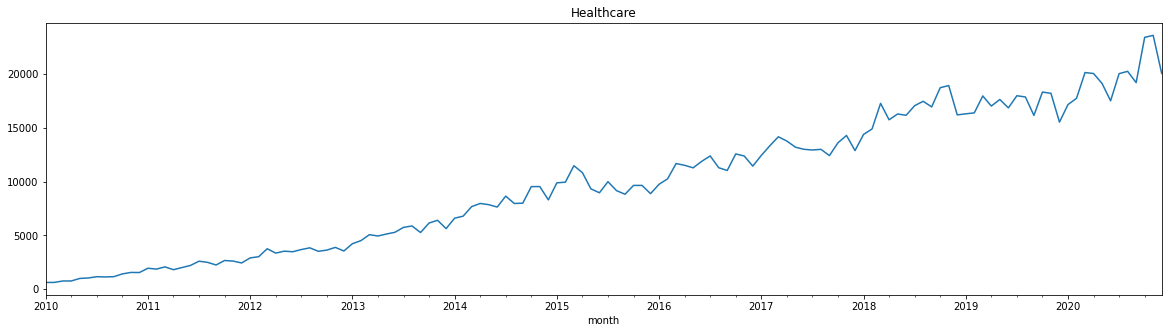

In [14]:
df_comp.Healthcare.plot(figsize=(20,5), title="Healthcare")
plt.show()

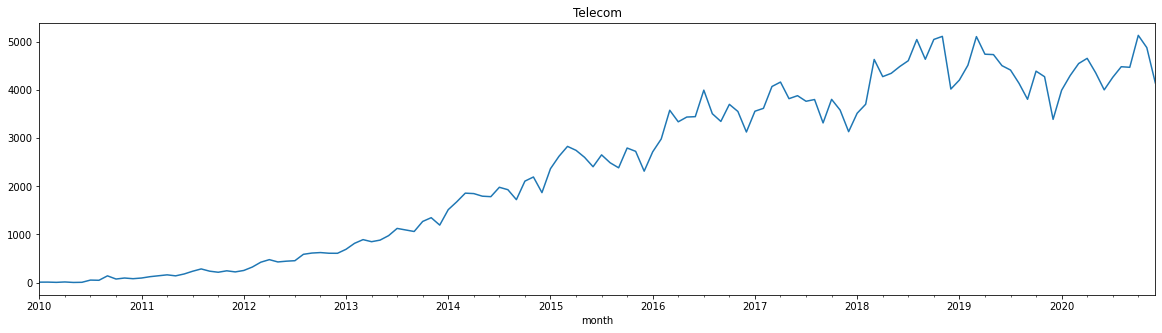

In [15]:
df_comp.Telecom.plot(figsize=(20,5), title="Telecom")
plt.show()

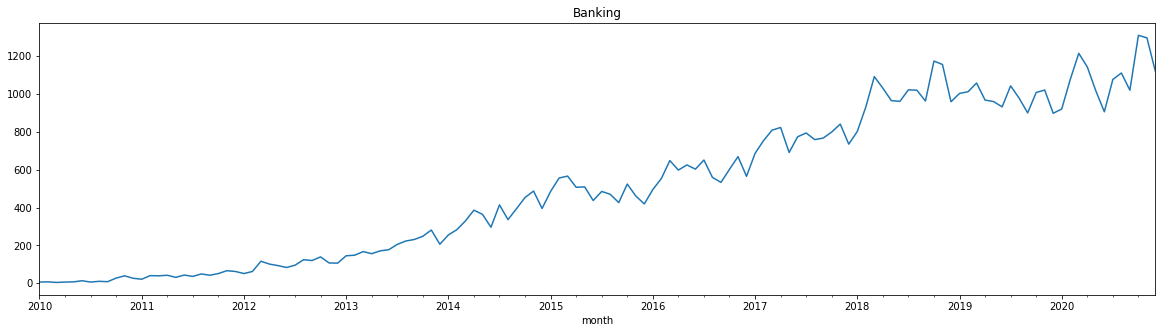

In [16]:
df_comp.Banking.plot(figsize=(20,5), title="Banking")
plt.show()

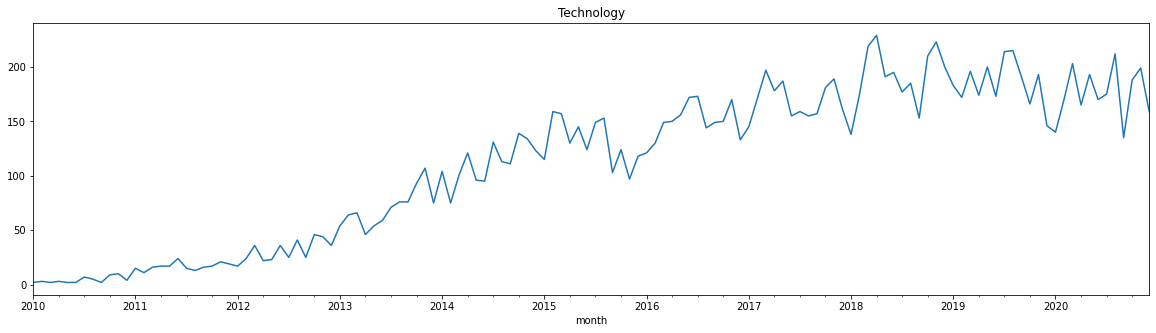

In [17]:
df_comp.Technology.plot(figsize=(20,5), title="Technology")
plt.show()

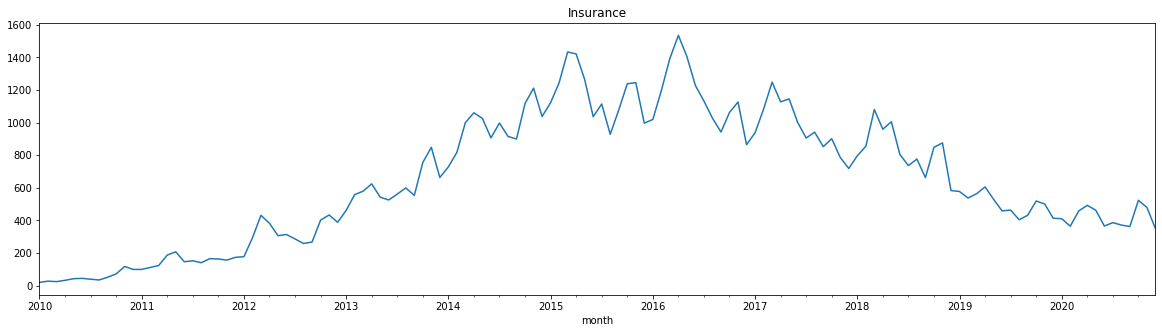

In [18]:
df_comp.Insurance.plot(figsize=(20,5), title="Insurance")
plt.show()

## Check for normality

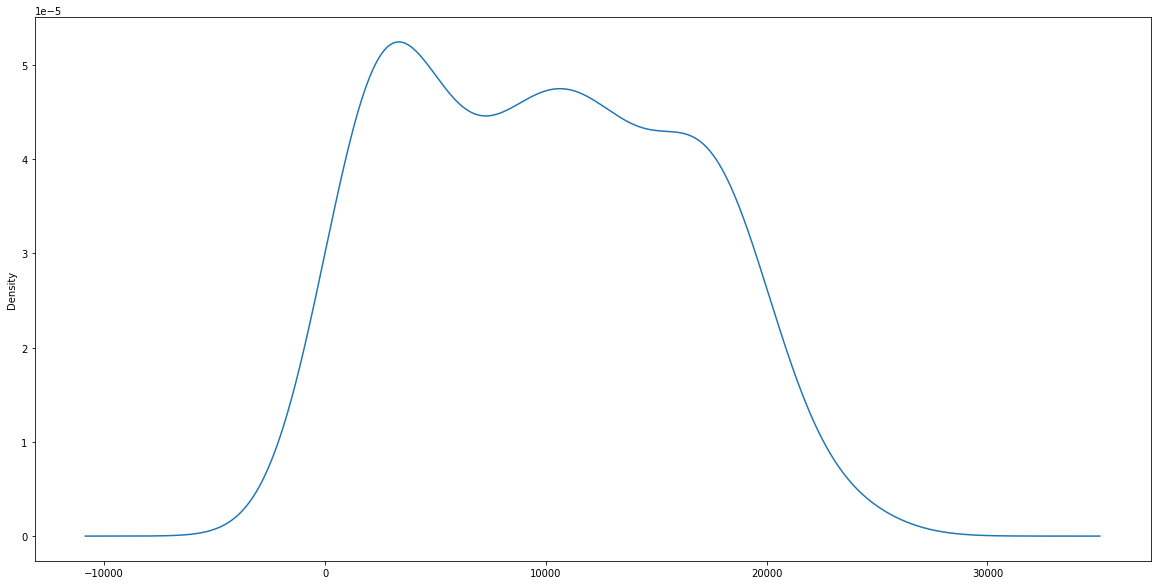

In [19]:
# Density Plots
df_comp["Healthcare"].plot(kind='kde', figsize=(20, 10))
pyplot.show()

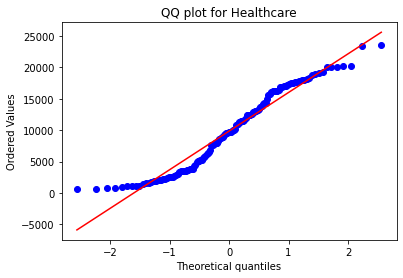

In [20]:
# The QQ plot
scipy.stats.probplot(df_comp["Healthcare"], plot=pylab)
plt.title("QQ plot for Healthcare")
pylab.show()

## Gaussian Process

In [21]:
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, ConstantKernel
from sklearn.gaussian_process.kernels import RationalQuadratic

k0 = WhiteKernel(noise_level=0.3**2, noise_level_bounds=(0.1**2, 0.5**2))

k1 = ConstantKernel(constant_value=2) * \
  ExpSineSquared(length_scale=1.0, periodicity=40, periodicity_bounds=(35, 45))

k2 = ConstantKernel(constant_value=100, constant_value_bounds=(1, 500)) * \
  RationalQuadratic(length_scale=500, length_scale_bounds=(1, 1e4), alpha= 50.0, alpha_bounds=(1, 1e3))

k3 = ConstantKernel(constant_value=1) * \
  ExpSineSquared(length_scale=1.0, periodicity=12, periodicity_bounds=(10, 15))

kernel_4  = k0 + k1 + k2 + k3

In [22]:
import mlfoundry as mlf
mlf_api = mlf.get_client() 
mlf_run = mlf_api.create_run(project_name='timeseries-project', run_name='gp2-model')

In [23]:
from sklearn.gaussian_process import GaussianProcessRegressor

gp2 = GaussianProcessRegressor(
    kernel=kernel_4, 
    n_restarts_optimizer=10, 
    normalize_y=True,
    alpha=0.0
)

In [24]:
data_df = df_comp[["timestamp", "Healthcare"]]

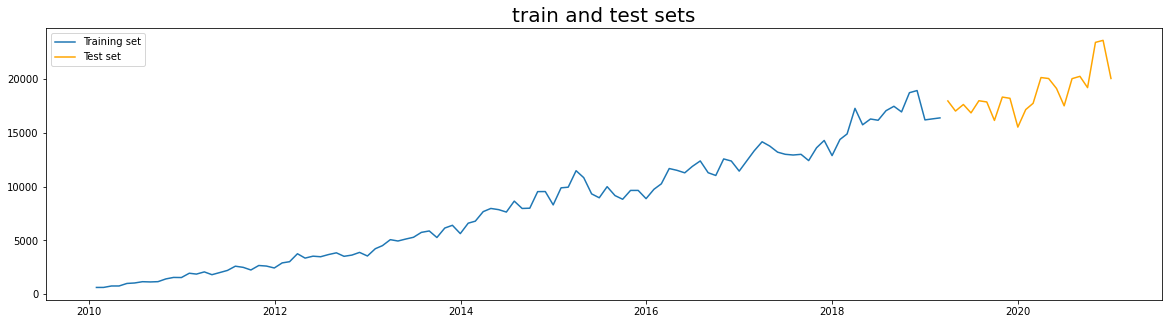

In [25]:
# train set split
test_size = 22
X = df_comp["timestamp"]
y = df_comp["Healthcare"]

x_train_t = X[:-test_size]
y_train_t = y[:-test_size]

x_test_t = X[-test_size:]
y_test_t = y[-test_size:]

df_train = df_comp[:-test_size]
df_test = df_comp[-test_size:]

plt.figure(figsize=(20,5))
plt.title('train and test sets', size=20)
plt.plot(y_train_t, label='Training set')
plt.plot(y_test_t, label='Test set', color='orange')

plt.legend()

In [26]:
# logging dataset
mlf_run.log_dataset(df_train, data_slice=mlf.DataSlice.TRAIN)  
mlf_run.log_dataset(df_test, data_slice=mlf.DataSlice.TEST)

In [27]:
x_train = x_train_t.values.reshape(-1, 1)
y_train = y_train_t.values.reshape(-1, 1)

x_test = x_test_t.values.reshape(-1, 1)
y_test = y_test_t.values.reshape(-1, 1)

In [28]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

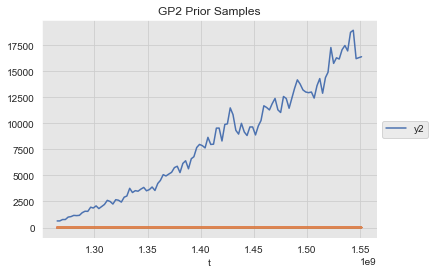

In [29]:
gp2_prior_samples = gp2.sample_y(X=x_train, n_samples=100)

fig, ax = plt.subplots()
for i in range(100):
    sns.lineplot(x=x_train[...,0], y = gp2_prior_samples[:, i], color=sns_c[1], alpha=0.2, ax=ax)
sns.lineplot(x=x_train[...,0], y=y_train[..., 0], color=sns_c[0], label='y2', ax=ax) 
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='GP2 Prior Samples', xlabel='t');

In [30]:
gp2.fit(x_train, y_train)

/home/Rohit/Documents/EntHire/Repos/python_client/env/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


GaussianProcessRegressor(alpha=0.0,
                         kernel=WhiteKernel(noise_level=0.09) + 1.41**2 * ExpSineSquared(length_scale=1, periodicity=40) + 10**2 * RationalQuadratic(alpha=50, length_scale=500) + 1**2 * ExpSineSquared(length_scale=1, periodicity=12),
                         n_restarts_optimizer=10, normalize_y=True)

In [31]:
mlf_run.log_params(gp2.get_params())    # logging params
mlf_run.log_model(gp2, mlf.ModelFramework.SKLEARN) # log model

In [32]:
# Generate predictions.
y_pred, y_std = gp2.predict(x_train, return_std=True)


df_train['y_pred'] = y_pred
df_train['y_std'] = y_std
df_train['y_pred_lwr'] = df_train['y_pred'] - 2*df_train['y_std']
df_train['y_pred_upr'] = df_train['y_pred'] + 2*df_train['y_std']

/tmp/ipykernel_107100/880761444.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y_pred'] = y_pred
/tmp/ipykernel_107100/880761444.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y_std'] = y_std
/tmp/ipykernel_107100/880761444.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [33]:
# Generate predictions.
y_pred_test, y_std_test = gp2.predict(x_test, return_std=True)


df_test['y_pred'] = y_pred_test
df_test['y_std'] = y_std_test
df_test['y_pred_lwr'] = df_test['y_pred'] - 2*df_test['y_std']
df_test['y_pred_upr'] = df_test['y_pred'] + 2*df_test['y_std']

/tmp/ipykernel_107100/3214600164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_pred'] = y_pred_test
/tmp/ipykernel_107100/3214600164.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_std'] = y_std_test
/tmp/ipykernel_107100/3214600164.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [34]:
mlf_run.log_predictions(df_test[['timestamp', 'Healthcare']], list(y_pred_test))   #logging predictions

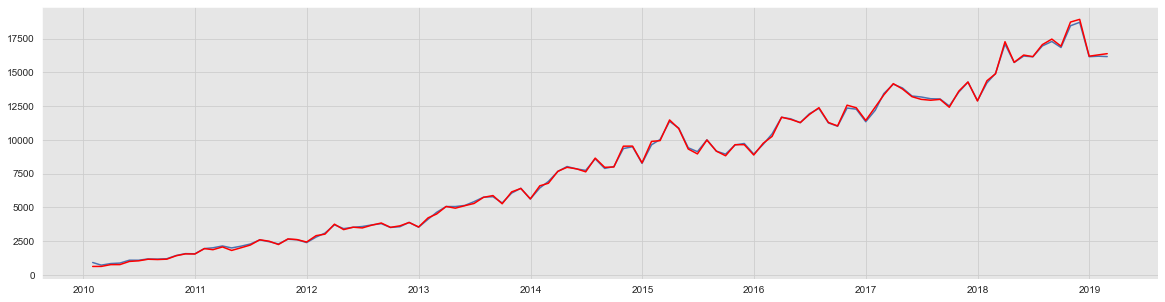

In [35]:
plt.figure(figsize=(20,5))
plt.plot(df_train["y_pred"])
plt.plot(df_train["Healthcare"], color='red')
plt.show()

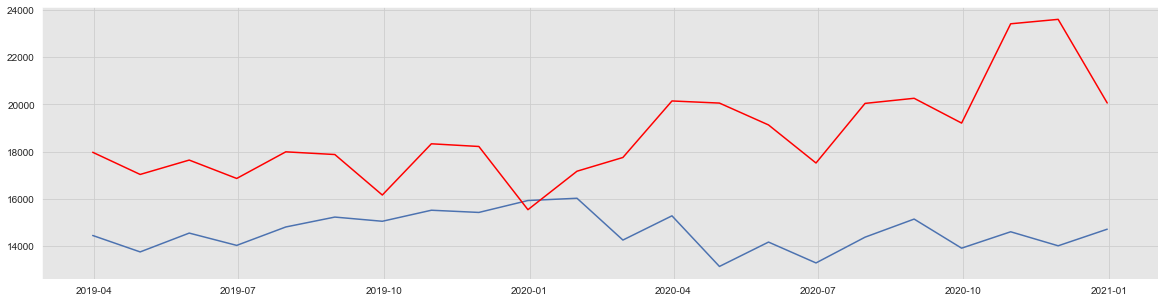

In [36]:
plt.figure(figsize=(20,5))
plt.plot(df_test["y_pred"])
plt.plot(df_test["Healthcare"], color='red')
plt.show()

In [37]:
print(f'R2 Score Train = {gp2.score(X=x_train, y=y_train): 0.3f}')
print(f'R2 Score Test = {gp2.score(X=x_test, y=y_test): 0.3f}')
print(f'MAE Train = {mean_absolute_error(y_true=y_train, y_pred=gp2.predict(x_train)): 0.3f}')
print(f'MAE Test = {mean_absolute_error(y_true=y_test, y_pred=gp2.predict(x_test)): 0.3f}')


R2 Score Train =  1.000
R2 Score Test = -4.593
MAE Train =  77.964
MAE Test =  4143.692


In [38]:
def mase_loss(y_test, y_pred, y_train):
    #  naive seasonal prediction
    y_train = np.asarray(y_train)
    y_pred_naive = y_train[:-1]

    # mean absolute error of naive seasonal prediction
    mae_naive = np.mean(np.abs(y_train[1:] - y_pred_naive))

    # if training data is flat, mae may be zero,
    # return np.nan to avoid divide by zero error
    # and np.inf values
    if mae_naive == 0:
        return np.nan
    else:
        return np.mean(np.abs(y_test - y_pred)) / mae_naive

masel = mase_loss(y_test, df_test["y_pred"].to_list(), df_train["Healthcare"].to_list())
mlf_run.log_metrics({'mase_loss': masel})    # logging metrics

In [39]:
import shap
explainer = shap.KernelExplainer(gp2.predict,x_train)
shap_values = explainer.shap_values(x_test)

mlf_run.log_dataset_stats(
    df_test, 
    data_slice=mlf.DataSlice.TEST,
    data_schema=mlf.Schema(
        feature_column_names=['timestamp'],
        prediction_column_name="y_pred",
        actual_column_name="Healthcare"
    ),
    model_type=mlf.ModelType.TIMESERIES,
    shap_values=shap_values
)

Using 110 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 22/22 [00:00<00:00, 50.60it/s]


WARN: Missing config


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


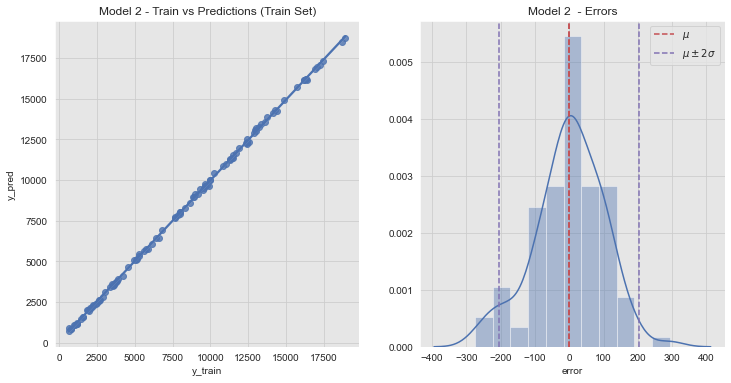

In [40]:
errors = gp2.predict(x_train) - y_train
errors = errors.flatten()
errors_mean = errors.mean()
errors_std = errors.std()

fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
sns.regplot(x=y_train.flatten(), y=gp2.predict(x_train).flatten(), ax=ax[0])
sns.distplot(a=errors, ax=ax[1])
ax[1].axvline(x=errors_mean, color=sns_c[3], linestyle='--', label=f'$\mu$')
ax[1].axvline(x=errors_mean + 2*errors_std, color=sns_c[4], linestyle='--', label=f'$\mu \pm 2\sigma$')
ax[1].axvline(x=errors_mean - 2*errors_std, color=sns_c[4], linestyle='--')
ax[1].axvline(x=errors_mean, color=sns_c[3], linestyle='--')
ax[1].legend()
ax[0].set(title='Model 2 - Train vs Predictions (Train Set)', xlabel='y_train', ylabel='y_pred');
ax[1].set(title='Model 2  - Errors', xlabel='error', ylabel=None);

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


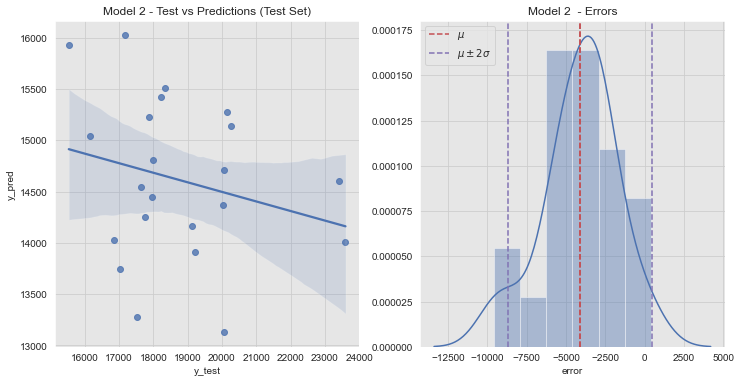

In [41]:
errors = gp2.predict(x_test) - y_test
errors = errors.flatten()
errors_mean = errors.mean()
errors_std = errors.std()

fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
sns.regplot(x=y_test.flatten(), y=gp2.predict(x_test).flatten(), ax=ax[0])
sns.distplot(a=errors, ax=ax[1])
ax[1].axvline(x=errors_mean, color=sns_c[3], linestyle='--', label=f'$\mu$')
ax[1].axvline(x=errors_mean + 2*errors_std, color=sns_c[4], linestyle='--', label=f'$\mu \pm 2\sigma$')
ax[1].axvline(x=errors_mean - 2*errors_std, color=sns_c[4], linestyle='--')
ax[1].axvline(x=errors_mean, color=sns_c[3], linestyle='--')
ax[1].legend()
ax[0].set(title='Model 2 - Test vs Predictions (Test Set)', xlabel='y_test', ylabel='y_pred');
ax[1].set(title='Model 2  - Errors', xlabel='error', ylabel=None);

## Difference (1)

In [42]:
mlf_run2 = mlf_api.create_run(project_name='timeseries-project', run_name='gp1-model')

In [43]:
df_comp["delta_1_Healthcare"] = df_comp.Healthcare.diff(1)

In [44]:
df_comp.head()

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels,timestamp,delta_1_Healthcare
month,,,,,,,,,
2010-01-31,631,8,6,2,19,1,4,1.264896e+09,NaN
2010-02-28,633,9,7,3,27,1,3,1.267315e+09,2.0
2010-03-31,766,4,4,2,24,1,1,1.269994e+09,133.0
2010-04-30,768,12,6,3,32,1,1,1.272586e+09,2.0
2010-05-31,1003,2,7,2,42,1,4,1.275264e+09,235.0


<AxesSubplot:xlabel='month'>

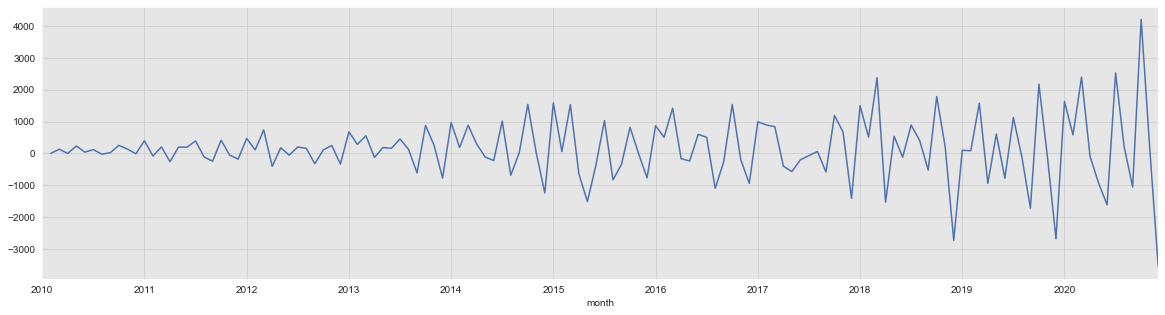

In [45]:
df_comp.delta_1_Healthcare.plot(figsize=(20,5))

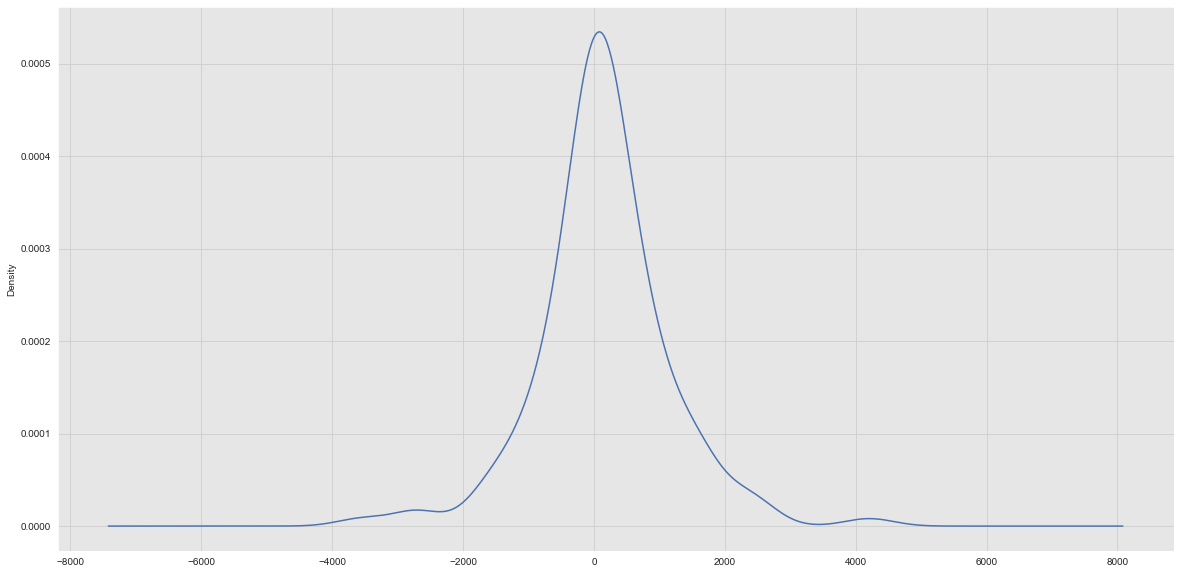

In [46]:
# Checking the normality again with Density Plots
df_comp["delta_1_Healthcare"].plot(kind='kde', figsize=(20, 10))
pyplot.show()

In [47]:
data_df_res = df_comp[["timestamp", "delta_1_Healthcare"]]

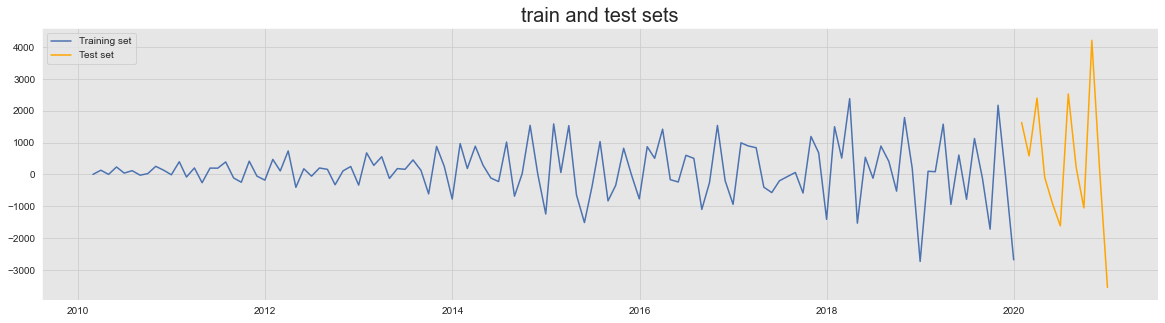

In [48]:
# train set split
test_size = 12
X = df_comp["timestamp"]
y = df_comp["delta_1_Healthcare"]

x_train_res = X[:-test_size]
y_train_res = y[:-test_size]

x_test_res = X[-test_size:]
y_test_res = y[-test_size:]

df_train_res = data_df_res[:-test_size][1:]
df_test_res = data_df_res[-test_size:][1:]

plt.figure(figsize=(20,5))
plt.title('train and test sets', size=20)
plt.plot(y_train_res, label='Training set')
plt.plot(y_test_res, label='Test set', color='orange')

plt.legend();

In [49]:
x_train_res_1 = x_train_res.values.reshape(-1, 1)[1:]
y_train_res_1 = y_train_res.values.reshape(-1, 1)[1:]

x_test_res_1 = x_test_res.values.reshape(-1, 1)[1:]
y_test_res_1 = y_test_res.values.reshape(-1, 1)[1:]

In [50]:
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, ConstantKernel

k0 = WhiteKernel(noise_level=0.3**2, noise_level_bounds=(0.1**2, 0.5**2))

k1 = ConstantKernel(constant_value=2) * \
  ExpSineSquared(length_scale=1.0, periodicity=40, periodicity_bounds=(35, 45))

kernel_1  = k0 + k1 

In [51]:
from sklearn.gaussian_process import GaussianProcessRegressor

gp1 = GaussianProcessRegressor(
    kernel=kernel_1, 
    n_restarts_optimizer=5, 
    normalize_y=True,
    alpha=0.0001
)

In [52]:
gp1.fit(x_train_res_1, y_train_res_1)

The optimal value found for dimension 0 of parameter k1__noise_level is close to the specified upper bound 0.25. Increasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified upper bound 45. Increasing the bound and calling fit again may find a better value.


GaussianProcessRegressor(alpha=0.0001,
                         kernel=WhiteKernel(noise_level=0.09) + 1.41**2 * ExpSineSquared(length_scale=1, periodicity=40),
                         n_restarts_optimizer=5, normalize_y=True)

In [53]:
mlf_run2.log_params(gp1.get_params())    # logging params
mlf_run2.log_model(gp1, mlf.ModelFramework.SKLEARN) # log model

In [54]:
# Generate predictions.
y_pred, y_std = gp1.predict(x_train_res_1, return_std=True)


df_train_res['y_pred'] = y_pred
df_train_res['y_std'] = y_std
df_train_res['y_pred_lwr'] = df_train_res['y_pred'] - 2*df_train_res['y_std']
df_train_res['y_pred_upr'] = df_train_res['y_pred'] + 2*df_train_res['y_std']

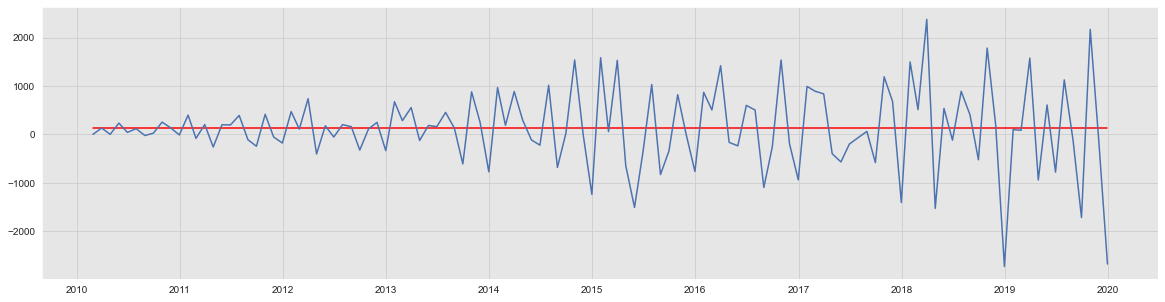

In [55]:
plt.figure(figsize=(20,5))
plt.plot(df_train_res["y_pred"], color='red')
plt.plot(df_train_res["delta_1_Healthcare"] )
plt.show()

In [56]:
# Generate predictions.
y_pred, y_std = gp1.predict(x_test_res_1, return_std=True)


df_test_res['y_pred'] = y_pred
df_test_res['y_std'] = y_std
df_test_res['y_pred_lwr'] = df_test_res['y_pred'] - 2*df_test_res['y_std']
df_test_res['y_pred_upr'] = df_test_res['y_pred'] + 2*df_test_res['y_std']

In [57]:
mlf_run.log_predictions(df_test_res[['timestamp', 'delta_1_Healthcare']], list(y_pred))   #logging predictions

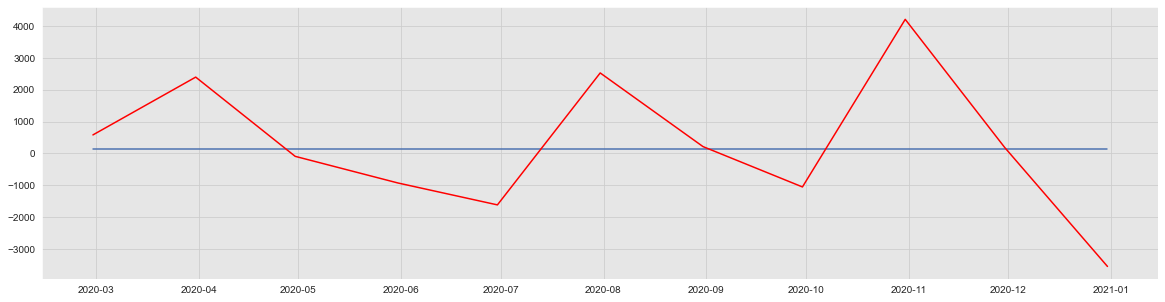

In [58]:
plt.figure(figsize=(20,5))
plt.plot(df_test_res["y_pred"])
plt.plot(df_test_res["delta_1_Healthcare"], color='red')
plt.show()

In [59]:
df_test_res

,timestamp,delta_1_Healthcare,y_pred,y_std,y_pred_lwr,y_pred_upr
month,,,,,,
2020-02-29,1.582934e+09,582.0,125.260504,410.584323,-695.908141,946.42915
2020-03-31,1.585613e+09,2395.0,125.260504,410.584323,-695.908141,946.42915
2020-04-30,1.588205e+09,-90.0,125.260504,410.584323,-695.908141,946.42915
2020-05-31,1.590883e+09,-926.0,125.260504,410.584323,-695.908141,946.42915
2020-06-30,1.593475e+09,-1613.0,125.260504,410.584323,-695.908141,946.42915
2020-07-31,1.596154e+09,2526.0,125.260504,410.584323,-695.908141,946.42915
2020-08-31,1.598832e+09,216.0,125.260504,410.584323,-695.908141,946.42915
2020-09-30,1.601424e+09,-1050.0,125.260504,410.584323,-695.908141,946.42915
2020-10-31,1.604102e+09,4207.0,125.260504,410.584323,-695.908141,946.42915


In [60]:
masel = mase_loss(df_test_res["delta_1_Healthcare"], df_test_res["y_pred"].to_list(), df_train_res["delta_1_Healthcare"].to_list())
mlf_run2.log_metrics({'mase_loss': masel})    # logging metrics

import shap
explainer = shap.KernelExplainer(gp1.predict,x_train)
shap_values = explainer.shap_values(x_test)

mlf_run2.log_dataset_stats(
    df_test_res, 
    data_slice=mlf.DataSlice.TEST,
    data_schema=mlf.Schema(
        feature_column_names=['timestamp'],
        prediction_column_name="y_pred",
        actual_column_name="delta_1_Healthcare"
    ),
    model_type=mlf.ModelType.TIMESERIES,
    shap_values=shap_values
)

Using 110 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 22/22 [00:00<00:00, 41.97it/s]
